In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
from prettytable import PrettyTable
import seaborn as sns

In [ ]:
data = pd.read_csv("Student_Performance.csv")
data

In [ ]:
data.describe()

,Hours Studied,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,6.530600,4.583300,55.224800
std,2.589309,1.695863,2.867348,19.212558
min,1.000000,4.000000,0.000000,10.000000
25%,3.000000,5.000000,2.000000,40.000000
50%,5.000000,7.000000,5.000000,55.000000
75%,7.000000,8.000000,7.000000,71.000000
max,9.000000,9.000000,9.000000,100.000000


In [ ]:
data.isnull().sum()

Hours Studied                       0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Extracurricular Activities        10000 non-null  object 
 2   Sleep Hours                       10000 non-null  int64  
 3   Sample Question Papers Practiced  10000 non-null  int64  
 4   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(3), object(1)
memory usage: 390.8+ KB


array([[<Axes: title={'center': 'Hours Studied'}>,
        <Axes: title={'center': 'Sleep Hours'}>],
       [<Axes: title={'center': 'Sample Question Papers Practiced'}>,
        <Axes: title={'center': 'Performance Index'}>]], dtype=object)

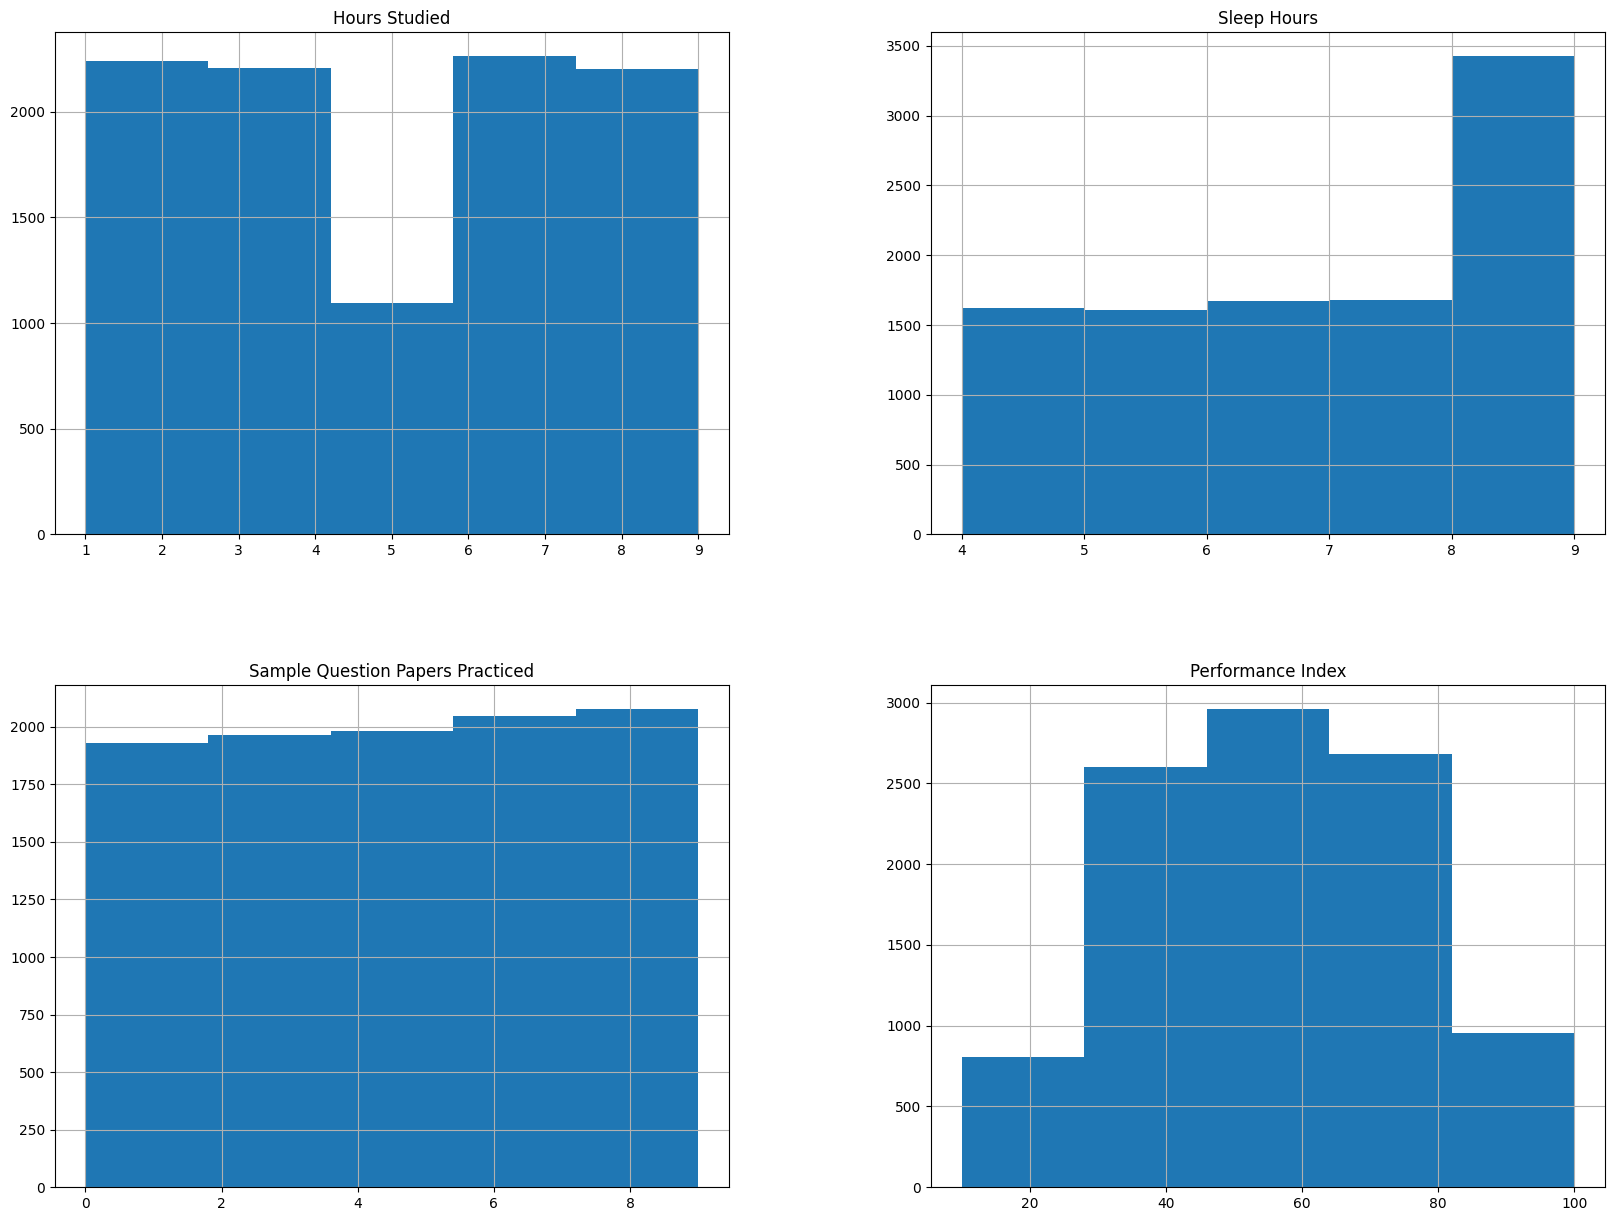

In [ ]:
data.hist(bins=5, figsize=(20,15))

In [ ]:
data_encoded = pd.get_dummies(data, drop_first=True)
data_encoded.head()

,Hours Studied,Sleep Hours,Sample Question Papers Practiced,Performance Index,Extracurricular Activities_Yes
0,7,9,1,91.0,1
1,4,4,2,65.0,0
2,8,7,2,45.0,1
3,5,5,2,36.0,1
4,7,8,5,66.0,0


**Распределение** **данных**

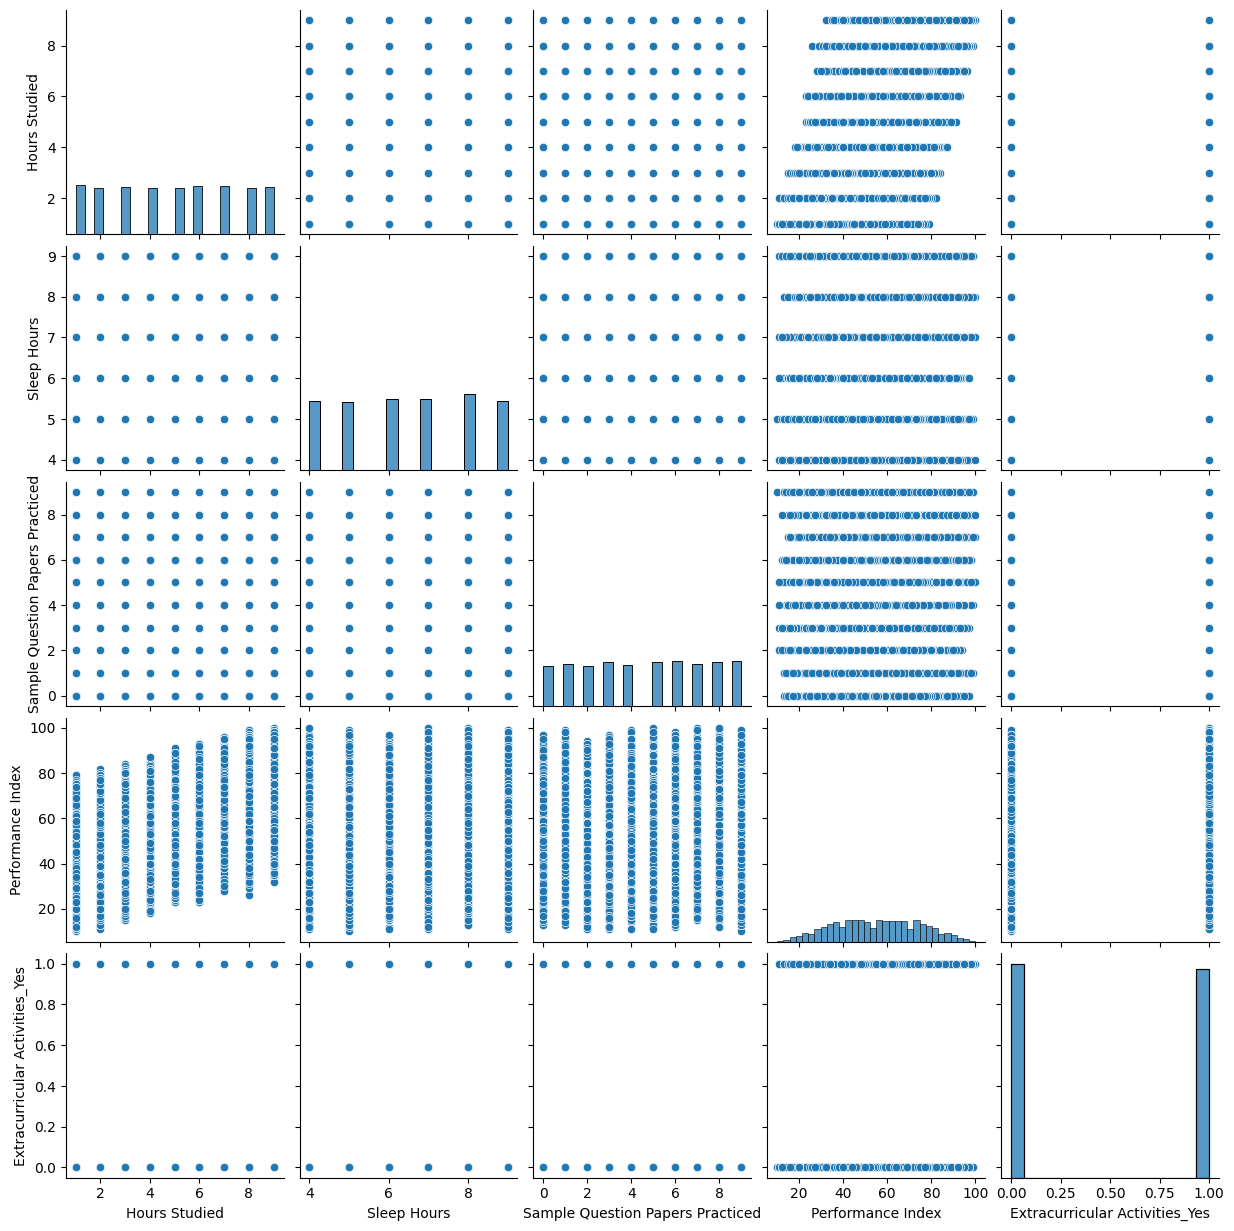

In [ ]:
sns.pairplot(data_encoded)

**Нормировка данных**

In [ ]:
for column, item in data_encoded.items():
  data_encoded[column] = (data_encoded[column] - min(item)) / (max(item) - min(item))
data_encoded

,Hours Studied,Sleep Hours,Sample Question Papers Practiced,Performance Index,Extracurricular Activities_Yes
0,0.750,1.0,0.111111,0.900000,1.0
1,0.375,0.0,0.222222,0.611111,0.0
2,0.875,0.6,0.222222,0.388889,1.0
3,0.500,0.2,0.222222,0.288889,1.0
4,0.750,0.8,0.555556,0.622222,0.0
...,...,...,...,...,...
9995,0.000,0.0,0.222222,0.144444,1.0
9996,0.750,0.8,0.555556,0.533333,1.0
9997,0.625,0.8,0.555556,0.711111,1.0
9998,1.000,0.6,0.000000,0.944444,1.0


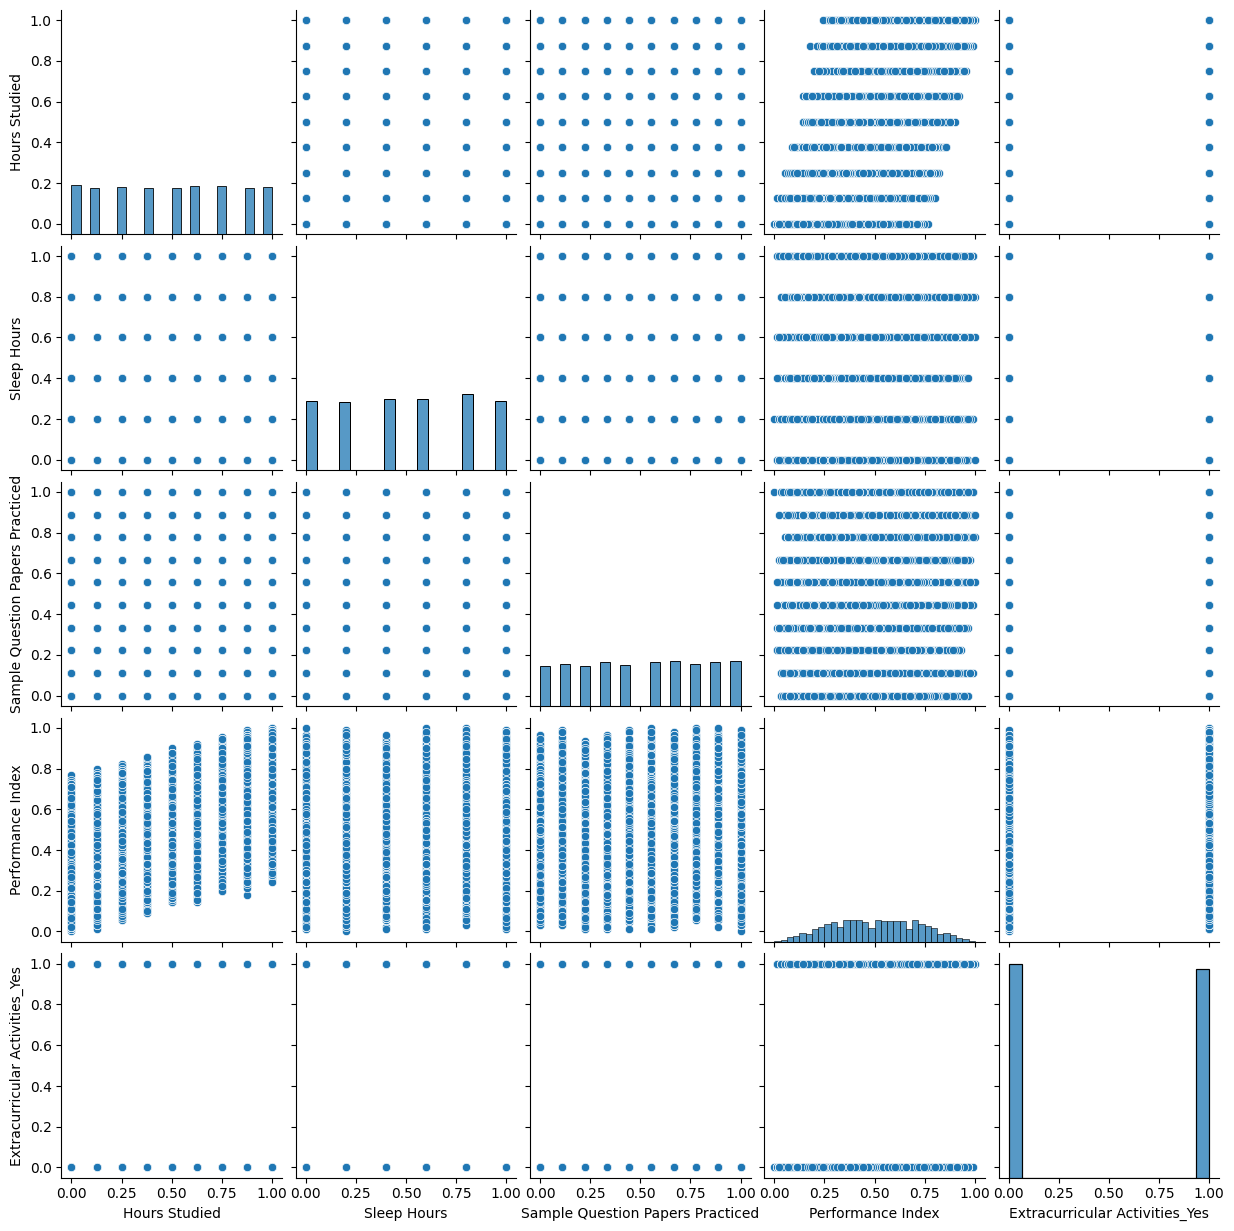

In [ ]:
sns.pairplot(data_encoded)

**Разделение данных**

In [ ]:
X = data_encoded.drop('Performance Index', axis=1)
Y = data_encoded['Performance Index']

In [ ]:
def train_test_split(X, Y):
  test_percent = 0.2
  random.seed(42)
  random.shuffle(list(range(len(X))))

  test_size = int(len(X) * test_percent)

  x_train = X[test_size:]
  x_test = X[:test_size]
  y_train = Y[test_size:]
  y_test = Y[:test_size]

  return x_train, x_test, y_train, y_test

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, Y)
x_train

,Hours Studied,Sleep Hours,Sample Question Papers Practiced,Extracurricular Activities_Yes
2000,0.000,0.8,0.888889,0.0
2001,0.500,0.6,0.444444,1.0
2002,0.375,0.8,0.000000,1.0
2003,0.750,0.2,0.222222,1.0
2004,0.500,1.0,0.333333,1.0
...,...,...,...,...
9995,0.000,0.0,0.222222,1.0
9996,0.750,0.8,0.555556,1.0
9997,0.625,0.8,0.555556,1.0
9998,1.000,0.6,0.000000,1.0


In [ ]:
def LinearRegression(x_train, x_test, y_train):
  x_train = np.hstack((np.ones((x_train.shape[0], 1)), x_train))
  x_test = np.hstack((np.ones((x_test.shape[0], 1)), x_test))

  B = np.linalg.inv(x_train.T.dot(x_train)).dot(x_train.T).dot(y_train)

  y_pred = x_test.dot(B)

  return B, y_pred

In [ ]:
def r2_score(y_test, y_pred):
  return 1 - ((((y_test - y_pred) ** 2).sum()) / ((y_test - y_test.mean()) ** 2).sum())

In [ ]:
#Коэффициенты модели и оценка R2 score
B, y_pred =  LinearRegression(x_train, x_test, y_train)
r2_result = r2_score(y_test, y_pred)
print("Beta: ", B)
print("y_pred: ", y_pred)
print("r2_score: ", r2_result)

Beta:  [0.34909506 0.24645076 0.02721931 0.02189303 0.01095362]
y_pred:  [0.57453861 0.44637921 0.59688979 ... 0.46514335 0.36369041 0.42409392]
r2_score:  0.14189674065832936


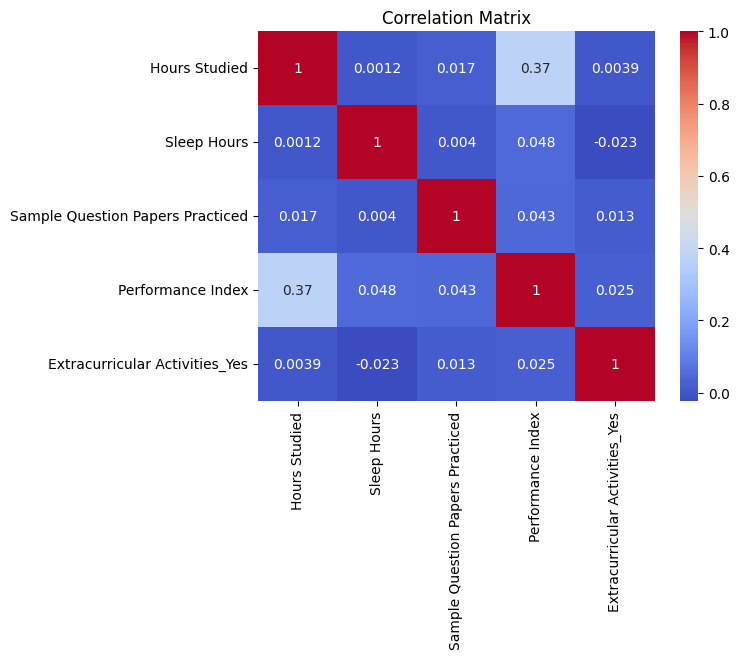

In [ ]:
corr_matrix = data_encoded.corr()

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

Первый набор признаков

In [ ]:
X = data_encoded[["Hours Studied", "Extracurricular Activities_Yes",  "Sleep Hours"]]
X.head()

,Hours Studied,Extracurricular Activities_Yes,Sleep Hours
0,0.750,1.0,1.0
1,0.375,0.0,0.0
2,0.875,1.0,0.6
3,0.500,1.0,0.2
4,0.750,0.0,0.8


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, Y)

In [ ]:
B, y_pred = LinearRegression(x_train, x_test, y_train)
r2_score(y_test, y_pred)

0.1397258420993781

Второй набор данных

In [ ]:
X = data_encoded[["Hours Studied", "Previous Scores",  "Sample Question Papers Practiced"]]
x_train, x_test, y_train, y_test = train_test_split(X, Y)
B, y_pred = LinearRegression(x_train, x_test, y_train)
r2_score(y_test, y_pred)

Третий набор данных

In [ ]:
X = data_encoded[["Sleep Hours", "Previous Scores",  "Sample Question Papers Practiced"]]
x_train, x_test, y_train, y_test = train_test_split(X, Y)
B, y_pred = LinearRegression(x_train, x_test, y_train)
r2_score(y_test, y_pred)

In [ ]:
import itertools
X = data_encoded.drop('Performance Index', axis=1)
best_feature_set = None
best_r2_score = -1
features_and_score = pd.DataFrame(columns=["Features", "R2 Score"])

for r in range(1, len(X.columns)+1):
    for features in itertools.combinations(X.columns, r):
        X_subset = data_encoded[list(features)]
        y = data_encoded["Performance Index"]

        x_train, x_test, y_train, y_test = train_test_split(X_subset, Y)

        B, y_pred = LinearRegression(x_train, x_test, y_train)

        r2 = r2_score(y_test, y_pred)
        features_and_score.loc[len(features_and_score)] = [", ".join(features), r2]

        if r2 > best_r2_score:
            best_feature_set = features
            best_r2_score = r2

features_and_score_sorted = features_and_score.sort_values(by='R2 Score', ascending=False)
display(features_and_score_sorted)

,Features,R2 Score
14,"Hours Studied, Sleep Hours, Sample Question Pa...",0.141897
10,"Hours Studied, Sleep Hours, Sample Question Pa...",0.141730
11,"Hours Studied, Sleep Hours, Extracurricular Ac...",0.139726
4,"Hours Studied, Sleep Hours",0.139510
12,"Hours Studied, Sample Question Papers Practice...",0.138024
5,"Hours Studied, Sample Question Papers Practiced",0.137906
6,"Hours Studied, Extracurricular Activities_Yes",0.135843
0,Hours Studied,0.135678
7,"Sleep Hours, Sample Question Papers Practiced",0.006924
13,"Sleep Hours, Sample Question Papers Practiced,...",0.006493


Ввод синтетического признака при построении модели

In [ ]:
data1 = pd.read_csv('Student_Performance.csv')
data1 = pd.get_dummies(data1, drop_first=True)
data1["Hours Per Paper Practiced"] = data1["Hours Studied"] / data1["Sample Question Papers Practiced"]
data1.drop(["Hours Studied", "Sample Question Papers Practiced"], axis=1, inplace=True)
data1.head()

,Previous Scores,Sleep Hours,Performance Index,Extracurricular Activities_Yes,Hours Per Paper Practiced
0,99,9,91.0,1,7.0
1,82,4,65.0,0,2.0
2,51,7,45.0,1,4.0
3,52,5,36.0,1,2.5
4,75,8,66.0,0,1.4


In [ ]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Previous Scores                 10000 non-null  int64  
 1   Sleep Hours                     10000 non-null  int64  
 2   Performance Index               10000 non-null  float64
 3   Extracurricular Activities_Yes  10000 non-null  uint8  
 4   Hours Per Paper Practiced       10000 non-null  float64
dtypes: float64(2), int64(2), uint8(1)
memory usage: 322.4 KB


In [ ]:
data1 = data1.replace([np.inf, -np.inf], np.nan)
data1.dropna(inplace=True)

In [ ]:
for column, item in data1.items():
  data1[column] = (data1[column] - min(item)) / (max(item) - min(item))
data1

,Previous Scores,Sleep Hours,Performance Index,Extracurricular Activities_Yes,Hours Per Paper Practiced
0,1.000000,1.0,0.900000,1.0,0.775000
1,0.711864,0.0,0.611111,0.0,0.212500
2,0.186441,0.6,0.388889,1.0,0.437500
3,0.203390,0.2,0.288889,1.0,0.268750
4,0.593220,0.8,0.622222,0.0,0.145000
...,...,...,...,...,...
9993,0.305085,0.6,0.500000,1.0,0.132143
9995,0.152542,0.0,0.144444,1.0,0.043750
9996,0.406780,0.8,0.533333,1.0,0.145000
9997,0.728814,0.8,0.711111,1.0,0.122500


In [ ]:
X1 = data1.drop('Performance Index', axis=1)
Y1 = data1['Performance Index']
x_train, x_test, y_train, y_test = train_test_split(X1, Y1)
B, y_pred = LinearRegression(x_train, x_test, y_train)
r2_score(y_test, y_pred)

0.870705087959738

In [ ]:
a = [1,2,3,4,5,6,7,8,9,10]
k = 7


In [ ]:
m=[2,3,7,8,4,9,5,10]
k=16
d={}
for i,num in enumerate(m):
  if num in d:
    print(d[num],i)
  else:
    d[k-num]=i
print(d)




2 5
{14: 0, 13: 1, 9: 2, 8: 3, 12: 4, 11: 6, 6: 7}
